In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Reading Data

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.shape, test_data.shape

((79853, 12), (34224, 11))

In [4]:
train_data.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [5]:
test_data.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [6]:
train_data.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [7]:
test_data.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


## Variable Identification

From above Datasets we can easily understand that target variable is independent variable and others are dependent variable.

In [8]:
train_data.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

As we conclude that all varibales in Dataset are numerical except soucing channel and resident area type

## Univariate Analysis

In [9]:
train_data["target"].value_counts()

1    74855
0     4998
Name: target, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0xac38d90>,
 'caps': [<matplotlib.lines.Line2D at 0xac4e1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0xac38b50>],
 'medians': [<matplotlib.lines.Line2D at 0xac4e650>],
 'fliers': [<matplotlib.lines.Line2D at 0xac4e870>],
 'means': []}

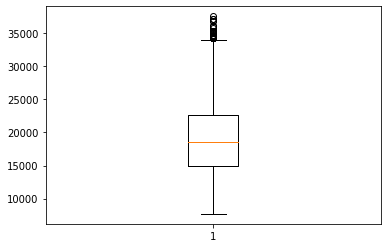

In [10]:
plt.boxplot(train_data["age_in_days"])

## Bivariate Analysis

<AxesSubplot:>

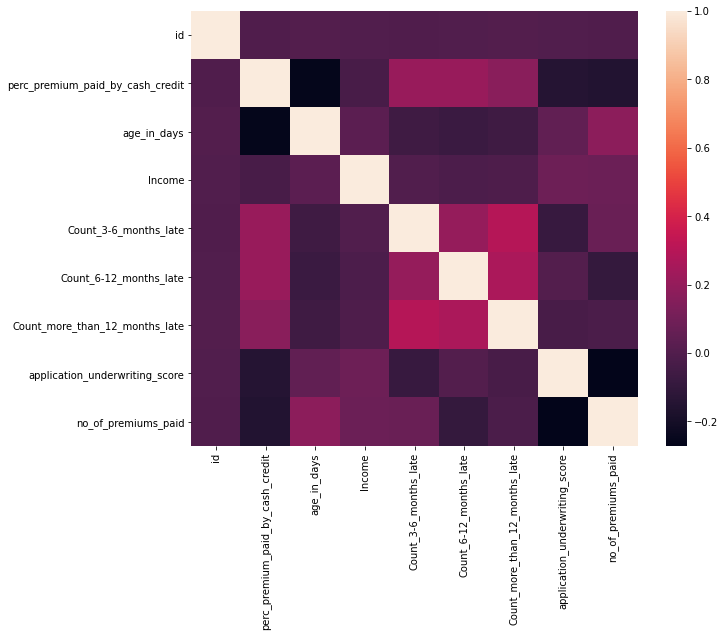

In [11]:
# Continous - Continous Variable
cor = train_data[["id","perc_premium_paid_by_cash_credit","age_in_days","Income","Count_3-6_months_late","Count_6-12_months_late","Count_more_than_12_months_late","application_underwriting_score","no_of_premiums_paid"]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(10,8)
sb.heatmap(cor)

As we conclude that none of them are strongly correlated with each other as most occuring correlation is below 0.4.

Looking for the relation of target variable with other variables.

<AxesSubplot:xlabel='target', ylabel='Income'>

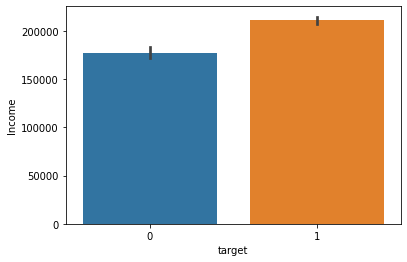

In [12]:
#Categorical - Continous Variable
sb.barplot(train_data["target"],train_data["Income"])

In [13]:
#Categorical - Categorical Variable
rel = train_data.groupby(["residence_area_type","target"])
rel.size()

residence_area_type  target
Rural                0          1998
                     1         29672
Urban                0          3000
                     1         45183
dtype: int64

## Missing Value Treatment

In [14]:
train_data.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [15]:
test_data.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
count,34224.000000,34224.000000,34224.000000,3.422400e+04,34193.000000,34193.000000,34193.000000,32901.000000,34224.000000
mean,56739.956376,0.314457,18824.215346,2.028201e+05,0.238733,0.080718,0.058111,99.061898,10.890428
std,32935.402647,0.334059,5246.525604,2.702536e+05,0.686162,0.454634,0.307046,0.742942,5.216867
min,1.000000,0.000000,7671.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000
25%,28254.750000,0.034000,14972.000000,1.063975e+05,0.000000,0.000000,0.000000,98.800000,7.000000
50%,56488.000000,0.169000,18623.000000,1.650700e+05,0.000000,0.000000,0.000000,99.210000,10.000000
75%,85386.250000,0.540000,22636.000000,2.500200e+05,0.000000,0.000000,0.000000,99.530000,14.000000
max,114077.000000,1.000000,35785.000000,2.191455e+07,12.000000,10.000000,7.000000,99.890000,59.000000


In [16]:
train_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [17]:
test_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

As we can understand that misssing values are present in our dataset both train and test which can reduce the accuracy of our mode. So, we have to solve this problem first.

In [18]:
train_data['Count_3-6_months_late'].fillna(train_data['Count_3-6_months_late'].mean(),inplace=True)
train_data['Count_6-12_months_late'].fillna(train_data['Count_6-12_months_late'].mean(),inplace=True)
train_data['Count_more_than_12_months_late'].fillna(train_data['Count_more_than_12_months_late'].mean(),inplace=True)
train_data['application_underwriting_score'].fillna(train_data['application_underwriting_score'].mean(),inplace=True)

In [19]:
test_data['Count_3-6_months_late'].fillna(test_data['Count_3-6_months_late'].mean(),inplace=True)
test_data['Count_6-12_months_late'].fillna(test_data['Count_6-12_months_late'].mean(),inplace=True)
test_data['Count_more_than_12_months_late'].fillna(test_data['Count_more_than_12_months_late'].mean(),inplace=True)
test_data['application_underwriting_score'].fillna(test_data['application_underwriting_score'].mean(),inplace=True)

## Variable Transformation

<AxesSubplot:xlabel='Income'>

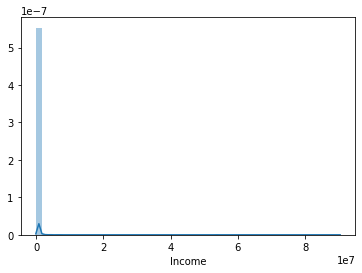

In [20]:
sb.distplot(train_data['Income'])

The above graph skewed towards right and hence we can use log transformation to solve this problem.

<AxesSubplot:xlabel='Income'>

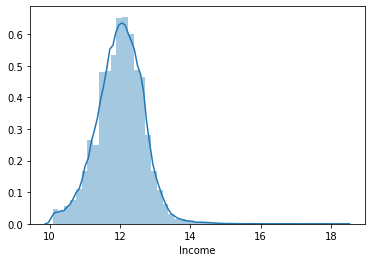

In [21]:
train_data['Income'] = np.log(train_data['Income'])
sb.distplot(train_data['Income'])

Now the distribution looks less skewed as compare to the above graph by the use og log transformation method.

## Model Building

## Decision Tree Classification Model

In [22]:
#Importing Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
#Splitin Test and train Datasets
x_train = train_data.drop(["target"],axis = 1)
y_train = train_data["target"]

In [24]:
#Creating Object
dt = DecisionTreeClassifier()

Getting dummies of categorical variables to fit the the model and predicting output

In [25]:
x_train = pd.get_dummies(x_train)
test_data = pd.get_dummies(test_data)

Before making the model, we will create a validation set to checking the performance of our model. So, we will divide the train set into training and validation set.

In [26]:
#Importing Libraries for valdation set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [27]:
x = train_data.drop(["target"],axis = 1)
y = train_data["target"]

In [28]:
#Spliting train data and validation data
train_x,x_val,train_y,y_val = train_test_split(x,y,random_state = 101)

In [29]:
train_x = pd.get_dummies(train_x)
x_val = pd.get_dummies(x_val)

In [30]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [31]:
pred = dt.predict(x_val)

In [32]:
#Calculation the accuracy of our predective model
cm = confusion_matrix(y_val,pred)
cm

array([[  314,   960],
       [ 1096, 17594]], dtype=int64)

In [33]:
total = sum(sum(cm))

In [34]:
accuracy = (cm[0,0] + cm[1,1])/total
accuracy

0.8970146263273893

Form the above result we can say that our model is not very bad as it has accuracy of approx 90% 

In [35]:
#Applying prediction on tests Datasets
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
prediction = dt.predict(test_data)

Finally, we will make the predictions, the next step is to save these predictions in a csv file.

In [37]:
submission = pd.DataFrame()

In [38]:
submission['id'] = test_data['id']

In [39]:
submission['target'] = prediction

In [40]:
submission.to_csv('submission.csv', header=True, index=False)